## Linear regression 
In this notebook we are going to create linear regression model for boston dataset - the aim of the task is to predict house prices based on numerical features. We  are going to:

* write a single regression model from scratch with one indepentend variable
* use numpy for estimating the regression coefficients
* validate the regression performance by looking at RSME and determination coefficient


* write a regression model with multiple variables from scratch
* use sklearn's LinearRegression to do the same task and compare results


Load data:

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [109]:
boston_dataframe = pd.read_csv('boston.csv', index_col=0)

In [110]:
y = boston_dataframe.pop('y')

In [111]:
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 USD
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000's USD

Create 'x' variable that is 'LSTAT' variable from boston dataset

In [112]:
y = boston.target
x = boston_dataframe['LSTAT']

## Simple linear regression

We will try to establish a linear relationship between two variables with simple linear regression i.e. a regression with one indepentend variable. We will take a *LSTAT* variable from Boston Dataset which means the percentage of lower status of the population in the nearest neighbourhood. We will try to predict prices of houses

Simple linear regression can be expressed as 
\begin{equation*}
Y = \beta_0 + \beta_1X
\end{equation*}

$\beta_0$ is the bias parameter (or interception) and,

$\beta_1$ is the slope parameter

We can estimate above parameters with the formulas:
\begin{equation*}
\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}
\end{equation*}

\begin{equation*}
\beta_0 = \bar{y} - \beta_1\bar{x}
\end{equation*}

We will implement those estimators from scratch in numpy

In [11]:
mean_y = np.mean(y)
mean_x = np.mean(x)

In the following line implement the equation for $\beta_1$

In [12]:
b1 = np.sum((x - mean_x) * (y - mean_y)) / np.sum(np.power(x - mean_x, 2))

In the following line implement the equation for $\beta_0$

In [15]:
b0 = mean_y - b1 * mean_x

In [16]:
print('Slope paramater: {} \nIntercept:{}'.format(b1, b0))

Slope paramater: -0.9500493537579907 
Intercept:34.5538408793831


We can predict what will be the theoretical average price of houses when the percentage of lower status population is:

* 10
* 15
* 20

write a function predict_simple_regression that will take the percentage of lower status population and return the linear regression prediction. Then predict prices for 10, 15, 20 % of lower status population

In [27]:
def predict_simple_regression(lower_status_population):
    return b0 + lower_status_population * b1

In [30]:
predict_simple_regression(10)

25.053347341803196

In [28]:
predict_simple_regression(15)

20.303100573013239

In [29]:
predict_simple_regression(20)

15.55285380422329

We can fit regression with the numpy.polyfit function with degree parameter set to be 1

In [21]:
fit = np.polyfit(x,y,1)
fit_function = np.poly1d(fit) 

print(fit)

[ -0.95004935  34.55384088]


Predictions can be made with created *fit_function*:

In [22]:
fit_fn(10)

25.053347341803192

In [24]:
fit_fn(15)

20.303100573013232

In [25]:
fit_fn(20)

15.552853804223275

We can plot the regression line against the data it was fitted on

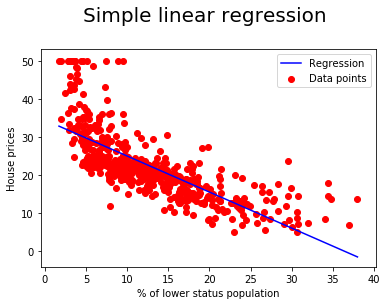

In [38]:
x_domain = np.linspace(np.min(x), np.max(x), 1000)
y_line = b0 + b1 * x_domain

# regression line
plt.plot(x_domain, y_line, color='blue', label='Regression')
# data points
plt.scatter(x, y, c='red', label='Data points')

plt.title('Simple linear regression \n', size=20)
plt.xlabel('% of lower status population')
plt.ylabel('House prices')
plt.legend()
plt.show()

We can compute the Root Mean Squared Error. 

\begin{equation*}
RMSE = \sqrt{\sum_{i=1}^{m} \frac{1}{m} (\hat{y_i} - y_i)^2}
\end{equation*}

To do this, we need to have the predicted values for each datapoint:

In [42]:
predictions = predict_simple_regression(x)
# let's print first 10 predictions
print(predictions[:10])

0    29.822595
1    25.870390
2    30.725142
3    31.760696
4    29.490078
5    29.604084
6    22.744727
7    16.360396
8     6.118864
9    18.307997
Name: LSTAT, dtype: float64


Write a function that implements RMSE error measure:

In [50]:
def rmse(y_true, predictions):
    return np.sqrt(np.sum((1 / len(predictions)) * np.power((predictions - y_true), 2)))

In [51]:
rmse(predictions, y)

6.2034641314264203

We can use the mean_squared_error function from sklearn.metrics package

In [69]:
from sklearn.metrics import mean_squared_error

In [56]:
print('MSE: {}'.format(mean_squared_error(predictions, y)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(predictions, y))))

MSE: 38.48296722989415
RMSE: 6.20346413142642


There is also a standardized measure used for looking at goodness of regression fit - it's called $R^2$ 

\begin{equation}
SS_t = \sum_{i=1}^{m} (y_i - \bar{y})^2
\end{equation}
\begin{equation}
SS_r = \sum_{i=1}^{m} (y_i - \hat{y_i})^2
\end{equation}
\begin{equation}
R^2 \equiv 1 - \frac{SS_r}{SS_t}
\end{equation}

The values of $R^2$ varies between 0 - 1 and could be used to compare different regression models. Now let's implement the r_squared function ;) 

In [65]:
def r_squared_from_scratch(y_true, predictions):
    sst = np.sum(np.power(y_true - np.mean(y_true), 2))
    ssr = np.sum(np.power(y_true - predictions, 2))
    return 1 - ssr/sst

In [66]:
r_squared_from_scratch(y, predictions)

0.5441462975864797

The same with built in r2_score function:

In [68]:
from  sklearn.metrics import r2_score
print(r2_score(y, predictions))

0.544146297586


## Multiple linear regression

We can extend the simple linear model to the case when we have more indepentend variables. The estimated formula would be written as following:

\begin{equation}
Y = \beta_0 + \beta_1x_1 + \beta_1x_2 + … + \beta_nx_n
\end{equation}

The Ordinary Least Square method can be employed to solve this problem. We will use the matrix approach. To do this, we can use the following equations:

\begin{equation}
\beta = (X^TX)^{-1}X^Ty
\end{equation}

where $X$ is the matrix of independent variables (with added column of ones - for estimating $\beta_0$)

Let's add a new column with ones to the existing dataset:

In [72]:
boston_dataframe['b0'] = 1

Now implement function that computes the vector of $\beta$ parameters.

Useful functions:
* np.linalg.inv - the inverse of a matrix
* .transpose() - method for transposing a matrix
* .dot() - method for multiplication (note: in matrix multiplication, the order matters!)

In [78]:
coeffs = np.linalg.inv(boston_dataframe.transpose().dot(boston_dataframe)).dot(boston_dataframe.transpose()).dot(y)

Let's print the estimated coefficients:

In [79]:
coeffs

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01,   3.64911033e+01])

Let's print the coefficient with the corresponding variables:

In [77]:
pd.DataFrame({'names': boston_dataframe.columns.tolist(), 'coeffs': coeffs})

,coeefs,names
0,-0.107171,CRIM
1,0.046395,ZN
2,0.020860,INDUS
3,2.688561,CHAS
4,-17.795759,NOX
5,3.804752,RM
6,0.000751,AGE
7,-1.475759,DIS
8,0.305655,RAD
9,-0.012329,TAX


It's easier with linear_model package from sklearn

In [92]:
from sklearn import linear_model

# Create linear regression object - we need to set fit_intercept paramater to be False
regr = linear_model.LinearRegression(fit_intercept=False)

regr.fit(boston_dataframe, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Let's get to regression coefficients by .coef_ field

In [87]:
regr.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01,   3.64911033e+01])

In [ ]:
As we can see

In [88]:
pd.DataFrame({'names': boston_dataframe.columns.tolist(), 'coeffs': regr.coef_})

,coeffs,names
0,-0.107171,CRIM
1,0.046395,ZN
2,0.020860,INDUS
3,2.688561,CHAS
4,-17.795759,NOX
5,3.804752,RM
6,0.000751,AGE
7,-1.475759,DIS
8,0.305655,RAD
9,-0.012329,TAX


With .predict() method you can make the predictions from the input dataset

In [89]:
predictions_scikit = regr.predict(boston_dataframe)

What's the $R^2$ score for such model?

In [91]:
print(regr.score(boston_dataframe, y))
print(r2_score(y, predictions_scikit))

0.740607742865
0.740607742865
